In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
from datetime import datetime
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
# Import the dataset
df = pd.read_csv("loan_final313.csv")
display(df.head())
display(df.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

In [3]:
# Choose 10 major features
df0 = df.iloc[:, [8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df0.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,3
2,12252,10.0,15.96,2400,1,0,1,3,2,3
3,49200,10.0,13.49,10000,1,0,1,4,2,3
4,80000,1.0,12.69,3000,2,0,1,4,1,2


In [4]:
# Independent variables X 
X1 = df0.iloc[:, :-1]
# Response variable y
y1 = df0.iloc[:, -1]
display(X1.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


In [5]:
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1,random_state=0)

In [6]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9439834118416012


In [8]:
# Show the importance of features
print(clf.feature_importances_)

[2.69803664e-02 1.12795800e-02 9.20897065e-01 2.31973018e-02
 6.17244210e-03 2.04456598e-03 3.71277467e-03 5.52210013e-03
 1.93804105e-04]


* Since the max_depth is not determined, this example is difficult is visulaized due to the large layers, the decision tree plot will be shown in the next section.

# 1 Max_depth 

In [9]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=15, random_state=0)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9566183596655322


In [10]:
# prediction rate over various max_depth
k_range = range(1, 21)
rate = []

start = datetime.now()
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rate.append(round(metrics.accuracy_score(y_test, y_pred), 3))
print(datetime.now()-start)
print(rate)

0:01:17.795402
[0.511, 0.771, 0.817, 0.866, 0.884, 0.91, 0.923, 0.939, 0.943, 0.948, 0.951, 0.953, 0.956, 0.956, 0.957, 0.957, 0.957, 0.956, 0.956, 0.955]


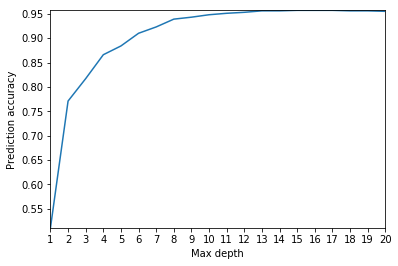

In [11]:
# plot
plt.plot(k_range, rate)
plt.axis([1,20, min(rate), max(rate)])
plt.xticks(k_range)
plt.xlabel('Max depth')
plt.ylabel('Prediction accuracy')
plt.savefig('accr_max_depth')

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


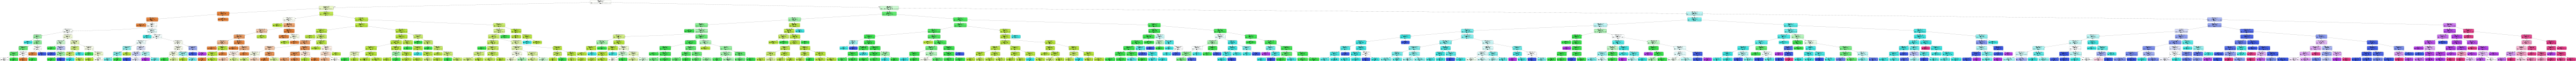

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1.columns, 
                class_names = (['A', 'B', 'C', 'D', 'E', 'F', 'G']))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.set_size('"50,50!"')
graph.write_png('loan.png')
Image(graph.create_png())

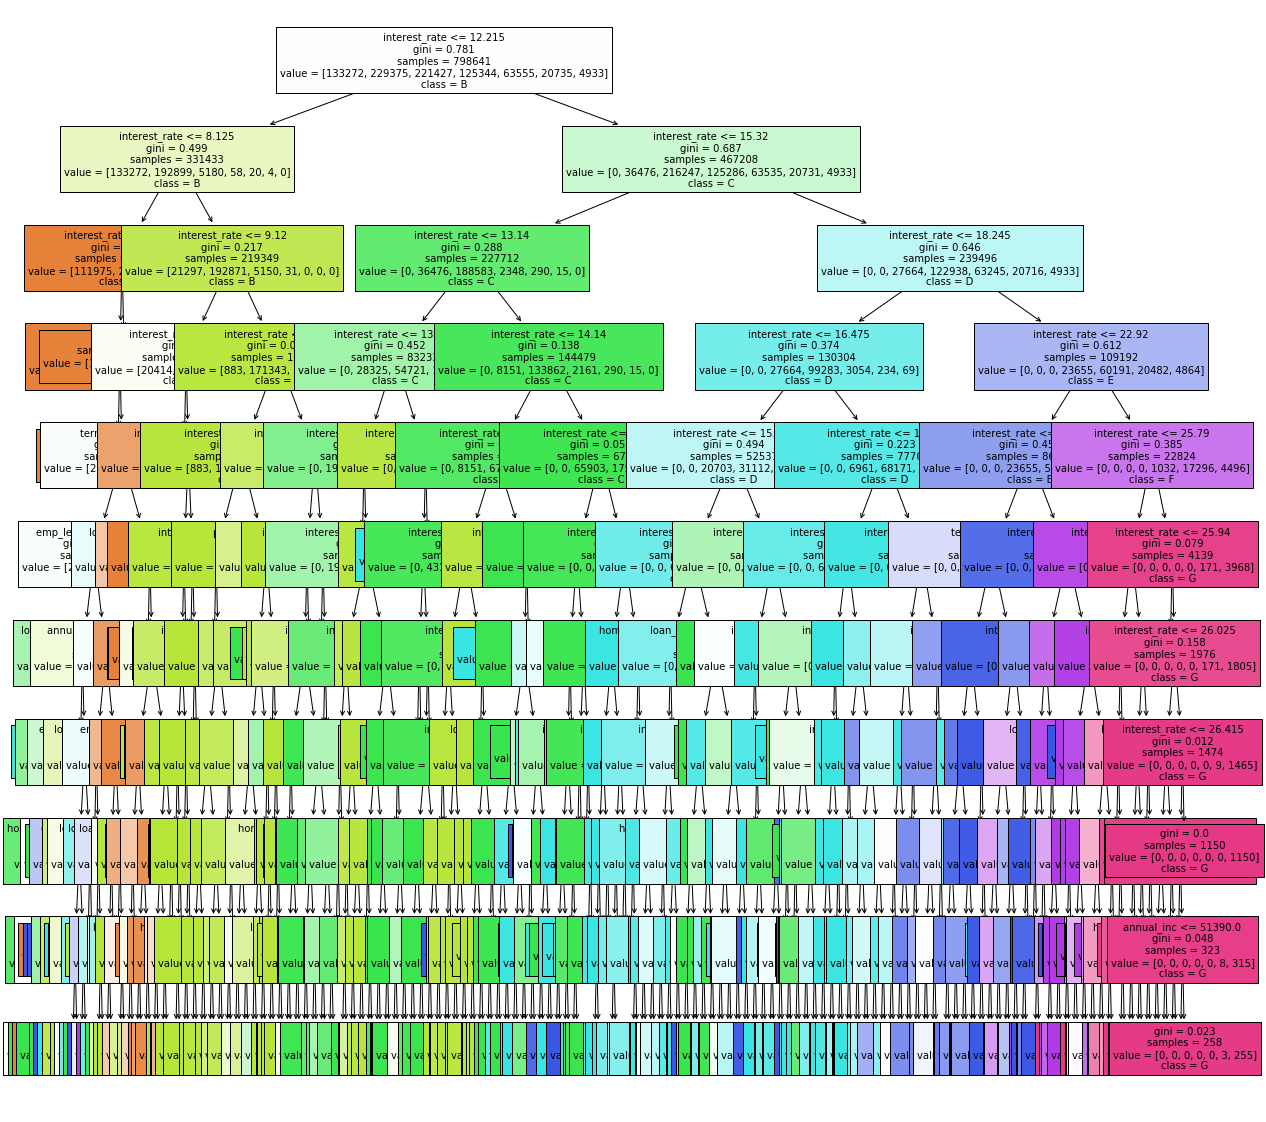

# 2 criterion

In [14]:
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0)
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=15, random_state=0, criterion="entropy")
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9540444905226623


# 3 min_samples_split

In [16]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, min_samples_split=3)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9445468683089544


In [17]:
# prediction rate over various max_depth
k_range = range(2, 21)
rate = []

start = datetime.now()
for k in k_range:
    clf = DecisionTreeClassifier(min_samples_split=k, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rate.append(round(metrics.accuracy_score(y_test, y_pred), 3))
print(datetime.now()-start)

print(rate)

0:01:49.144027
[0.945, 0.945, 0.945, 0.946, 0.946, 0.947, 0.947, 0.947, 0.947, 0.948, 0.948, 0.949, 0.949, 0.95, 0.95, 0.95, 0.95, 0.951, 0.951]


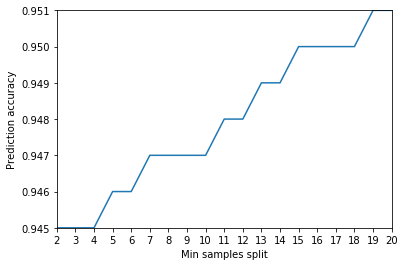

In [18]:
# plot
plt.plot(k_range, rate)
plt.axis([2, 20, min(rate), max(rate)])
plt.xticks(k_range)
plt.xlabel('Min samples split')
plt.ylabel('Prediction accuracy')
plt.savefig('min_samples_split')

# 4 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
start=datetime.now()
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))
print (datetime.now()-start)

0.944386846672226
0:06:33.183420


# 5 Visualization

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


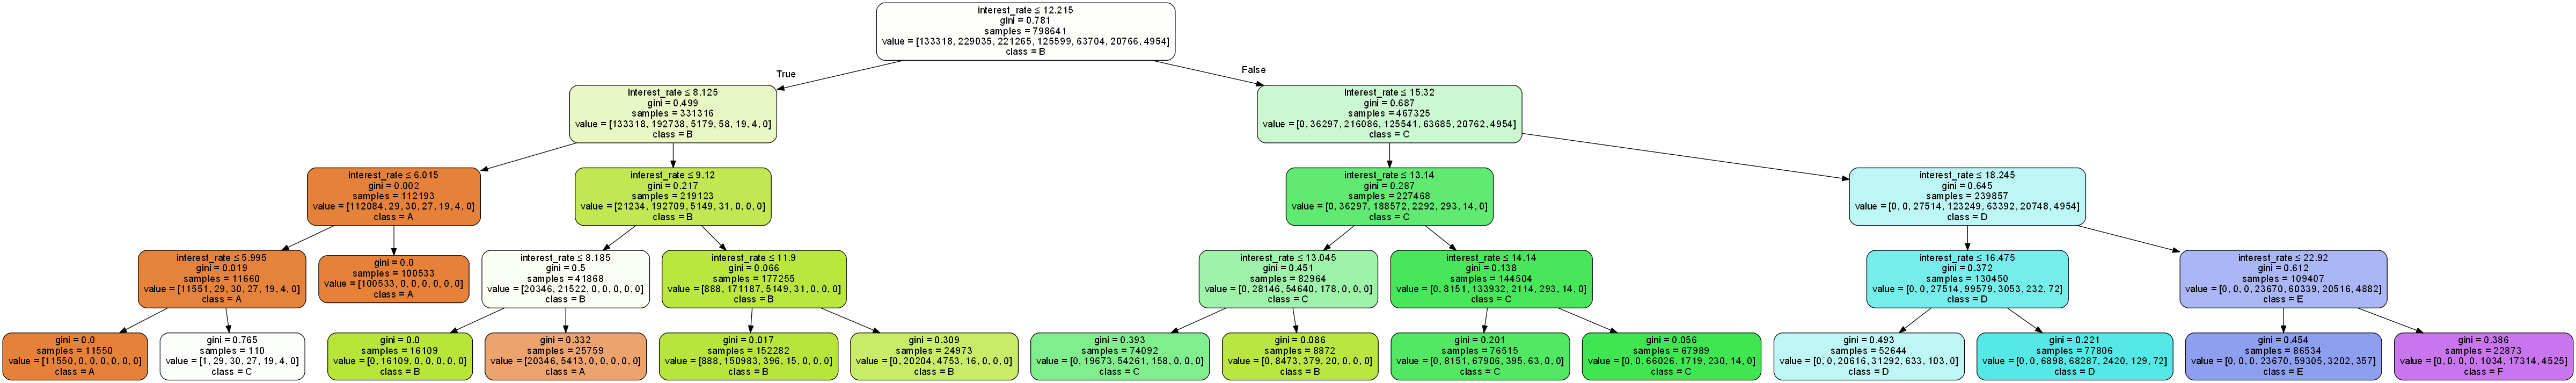

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


#Decision tree with max_length = 10 is still hard to visualize, to show how the model works, we set max_depth as 3 to hava a basic idea.
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
# Fit the decision tree classifer
clf.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1.columns, 
                class_names = (['A', 'B', 'C', 'D', 'E', 'F', 'G']))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.set_size('"50,50!"')
graph.write_png('loan2.png')
Image(graph.create_png())

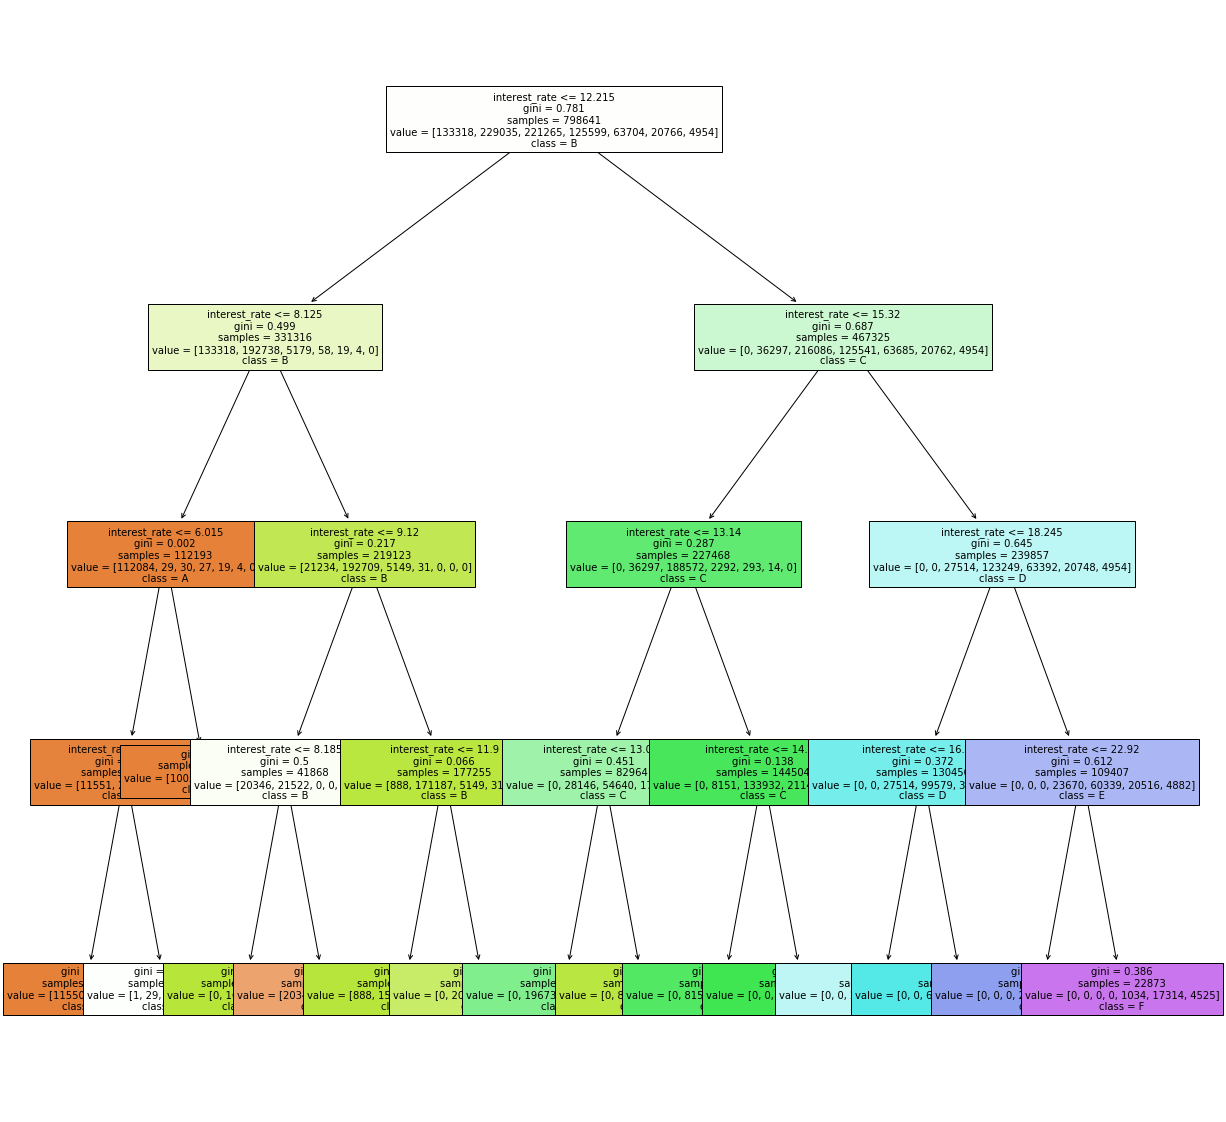

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(clf, feature_names = X1.columns, class_names = (['A', 'B', 'C', 'D', 'E', 'F', 'G']),
              fontsize=10, filled=True)
plt.show()

# 6 test size

In [24]:
# Create a decision tree classifier
clf = DecisionTreeClassifier( random_state=0)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9436904144785774


In [26]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9441862561698483


In [27]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9442966936374496


# 7 extract feature

In [28]:
# Show the importance of features
print(clf.feature_importances_)

[2.68330622e-02 1.16539603e-02 9.21365132e-01 2.30333489e-02
 6.11526487e-03 1.89182191e-03 3.41917961e-03 5.49891872e-03
 1.89311450e-04]


In [29]:
X2 = X1.iloc[:,0:4]
display(X2.head())

,annual_inc,emp_length_int,interest_rate,loan_amount
0,24000,10.0,10.65,5000
1,30000,0.5,15.27,2500
2,12252,10.0,15.96,2400
3,49200,10.0,13.49,10000
4,80000,1.0,12.69,3000


In [30]:
# Create a decision tree classifier
clf = DecisionTreeClassifier( random_state=0)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X2, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9411345759426627


# 8 Scaling before decision tree

In [31]:
from sklearn.preprocessing import MinMaxScaler
X1_scale = MinMaxScaler().fit_transform(X1)

In [32]:
# Create a decision tree classifier
clf = DecisionTreeClassifier( random_state=0)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9440825801798554


# 9 splitter

In [33]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=0,  splitter='random')
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.8938402938988934


# 10 min_samples_split

In [34]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=15, random_state=0, min_samples_split=3)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9568031733868241


# 11 min_samples_leaf

In [35]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.947134260407041


# 12 max_features

In [37]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, max_features='log2')
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9105997430638509


In [38]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, max_features=2)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.885920349793775


In [41]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, max_features='auto')
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9029096891974127


# 13 class weight

In [39]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9458090107958259


# 14 ccp_alpha

In [40]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, ccp_alpha = 0.0001)
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
# Fit the decision tree classifer
clf.fit(X_train, y_train)
# Predict 
y_pred = clf.predict(X_test)
# Accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.9530392841849039
